In [1]:
# Mount google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')
%pylab inline
from fastai.vision import *
from pathlib import Path
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
base_dir = '/content/drive/My Drive/Computer Vision/Project/'
data_dir = base_dir + 'Hand_Dataset/Train'

In [4]:
path=Path(data_dir)

In [5]:
path.ls()

[PosixPath('/content/drive/My Drive/Computer Vision/Project/Hand_Dataset/Train/Stop'),
 PosixPath('/content/drive/My Drive/Computer Vision/Project/Hand_Dataset/Train/Descend'),
 PosixPath('/content/drive/My Drive/Computer Vision/Project/Hand_Dataset/Train/Forward'),
 PosixPath('/content/drive/My Drive/Computer Vision/Project/Hand_Dataset/Train/Target')]

Before any work can be done a dataset needs to be converted into a DataBunch object, and in the case of the computer vision data - specifically into an ImageDataBunch subclass.

Since our images are placed in folders whose names correspond to the image labels, we will use the ImageDataBunch.from_folder() function to create an object that contains our image data. This is super useful and makes it incredibly easy to read the data into our model

Fastai can automatically split our data into train and validation sets, so we don't even need to create these on our own.

The only hyperparameters we need are the path-variable pointing to our data set, the size of the inputs and the batch size for each gradient descent iteration.

The function argument called get_transforms() which returns a list of available image transformations upon call.


The parameter valid_pct which controls the percentage of images that will be randomly chosen to be in the validation set.

In [6]:
data = ImageDataBunch.from_folder(path=path,
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(),
                                  size=256,
                                  bs=64)

You can see the data from different folders being grouped into 4 classes.

In [ ]:
#data.add_test(data_test)

In [7]:
data

ImageDataBunch;

Train: LabelList (3140 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Stop,Stop,Stop,Stop,Stop
Path: /content/drive/My Drive/Computer Vision/Project/Hand_Dataset/Train;

Valid: LabelList (784 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Forward,Forward,Stop,Forward,Forward
Path: /content/drive/My Drive/Computer Vision/Project/Hand_Dataset/Train;

Test: None

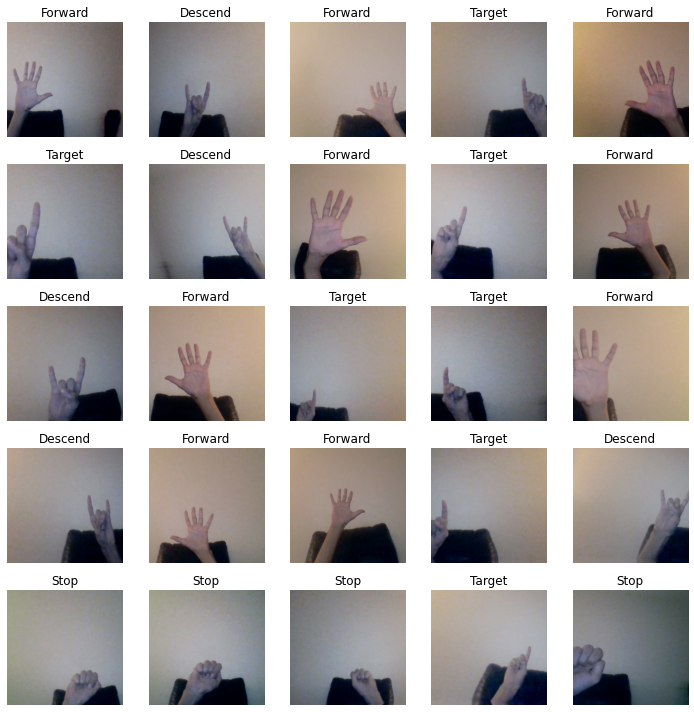

In [8]:
data.show_batch(figsize=(10,10))

Fastai has a function called create_cnn() from its vision module. This function creates what is called a learner object, which we'll put into a named variable. We are using the ResNet34 architecture as our base model for transfer learning. Upon call, the trained architecture will be downloaded via the Fastai API and stored locally.

In [9]:
learn=cnn_learner(data, models.resnet34, metrics=accuracy)

The learner object we create comes with a build-in function to find the optimal learning rate, or range of learning rates, for training. It achieves this by fitting the model for a few epochs and saving for which learning rates the loss decreases the most.

In [10]:
learn.freeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In the following plot, which is stored in the recorder object of our learner, we can see the loss for different learning rates.

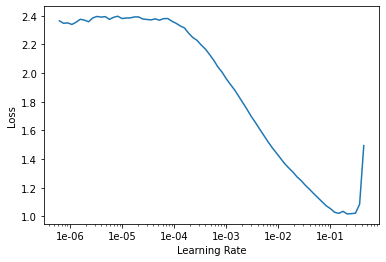

In [12]:
learn.recorder.plot()

In [ ]:
import torch
torch.cuda.get_device_name(0)

'Tesla T4'

Now let’s fit our model for 4 epochs, with a learning rate between 0.002 and 0.02

In [13]:
lr=1e-2

In [14]:
learn.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.394345,0.012572,0.994898,05:11
1,0.146911,0.000079,1.000000,03:11
2,0.083695,0.001981,0.998724,03:12
3,0.057442,0.000008,1.000000,03:10
4,0.035399,0.000004,1.000000,03:09
5,0.029438,0.000005,1.000000,03:09
6,0.023026,0.000006,1.000000,03:09
7,0.014845,0.000004,1.000000,03:08


In [ ]:
learn.save('Model1')

Lastly, we can use FastAIs ClassificationInterpretation class to interpret our results. To create an interpretation object we need to call the from_learner method and pass it our learner/model. 

In [15]:
interp=ClassificationInterpretation.from_learner(learn)

The below function plots the confusion matrix for predicted and actual output.

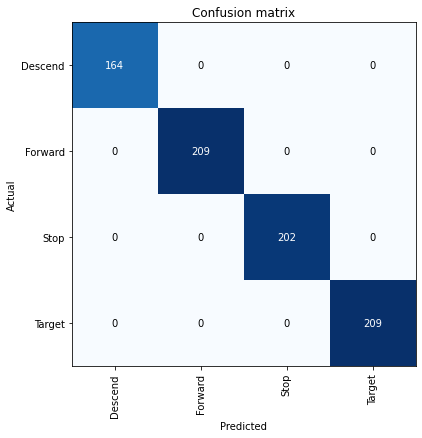

In [16]:
interp.plot_confusion_matrix(figsize=(6,6))

The below function shows images in top_losses along with their prediction, actual, loss, and probability of actual class.

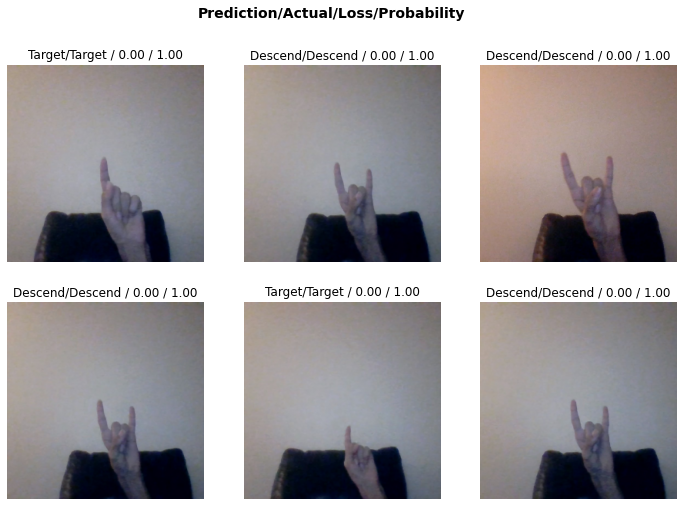

In [17]:
interp.plot_top_losses(k=6, figsize=(12, 8))

The below function gives the most frequently mismatched classes.

In [18]:
interp.most_confused(min_val=2)

[]